<a href="https://colab.research.google.com/github/Aditya2600/Covid-19-Tweets-Sentiment-Analysis/blob/main/Sentiment_Analysis_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

!pip install --user -U nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install chardet

In [ ]:
import chardet

with open('./Corona_NLP_train.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])

MacRoman


In [ ]:
dataframe = pd.read_csv("./Corona_NLP_train.csv", encoding=result['encoding'])

In [ ]:
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Labels in the dataset:  ['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


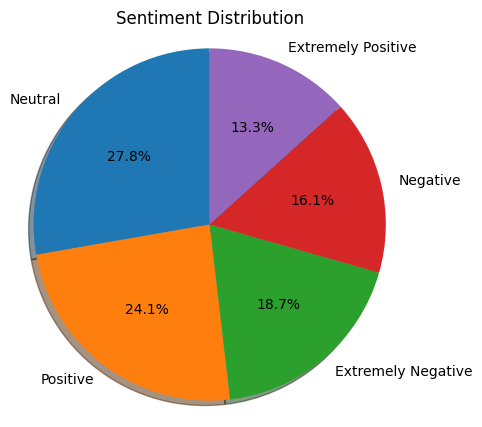

In [ ]:
def pie_chart(dataframe):
  label_types = dataframe.Sentiment.unique().astype(str)
  label_counts = dataframe.Sentiment.value_counts()
  print('Labels in the dataset: ', label_types)
  print(label_counts)
  labels = label_types
  sizes = [count for count in label_counts]
  fig = plt.figure(figsize=(5, 5))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
  plt.title('Sentiment Distribution')
  plt.axis('equal')
  plt.show()

pie_chart(dataframe)

In [ ]:
dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].shape


(9917,)

In [ ]:
dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].shape


(11422,)

In [ ]:
all_positive_tweets = list(dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].astype(str))[:9917]
all_negative_tweets = list(dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))

In [ ]:
tweet = all_positive_tweets[1222]
word = tweet.split()
print('Using Split :', word)

Using Split : ['#NSTnation:', 'The', 'streets', 'were', 'extra', 'quiet', 'with', 'plenty', 'of', 'parking', 'spaces', 'available', 'at', 'shopping', 'malls.', 'Gaya', 'Street,', 'a', 'major', 'city', 'centre', 'thoroughfare', 'was', 'deserted', 'as', 'well.', 'https://t.co/0jqWH5YNLV', '#MCO', '#MovementControlOrder', '#coronavirus', '#covid19', '#sabah']


In [ ]:
tokens = re.findall("[\w']+", tweet)
print('Using regexes :', tokens)

Using regexes : ['NSTnation', 'The', 'streets', 'were', 'extra', 'quiet', 'with', 'plenty', 'of', 'parking', 'spaces', 'available', 'at', 'shopping', 'malls', 'Gaya', 'Street', 'a', 'major', 'city', 'centre', 'thoroughfare', 'was', 'deserted', 'as', 'well', 'https', 't', 'co', '0jqWH5YNLV', 'MCO', 'MovementControlOrder', 'coronavirus', 'covid19', 'sabah']


In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tokens = tknzr.tokenize(tweet)
print('Using TweetTokenizer :', tokens)

Using TweetTokenizer : ['#NSTnation', ':', 'The', 'streets', 'were', 'extra', 'quiet', 'with', 'plenty', 'of', 'parking', 'spaces', 'available', 'at', 'shopping', 'malls', '.', 'Gaya', 'Street', ',', 'a', 'major', 'city', 'centre', 'thoroughfare', 'was', 'deserted', 'as', 'well', '.', 'https://t.co/0jqWH5YNLV', '#MCO', '#MovementControlOrder', '#coronavirus', '#covid19', '#sabah']


In [ ]:
splits = tweet.split('. ')
print('Using Splits :', splits)

sentence_splits = re.compile('[.!?] ').split(tweet)
print('Using regexes :', sentence_splits)

Using Splits : ['#NSTnation: The streets were extra quiet with plenty of parking spaces available at shopping malls', 'Gaya Street, a major city centre thoroughfare was deserted as well.\r\r\n\r\r\nhttps://t.co/0jqWH5YNLV\r\r\n\r\r\n#MCO #MovementControlOrder #coronavirus #covid19 #sabah']
Using regexes : ['#NSTnation: The streets were extra quiet with plenty of parking spaces available at shopping malls', 'Gaya Street, a major city centre thoroughfare was deserted as well.\r\r\n\r\r\nhttps://t.co/0jqWH5YNLV\r\r\n\r\r\n#MCO #MovementControlOrder #coronavirus #covid19 #sabah']


In [ ]:
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet = all_positive_tweets[12]
tweet

'Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS'

In [ ]:
print('\033[92m' + tweet)
print('\033[94m')

tweet2 = re.sub(r'^RT[\s]+', '', tweet)

tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS

Now I can go to the supermarket like this without being judged! ? CoronavirusOutbreak COVID2019 


In [ ]:
print()
print('\033[92m' + tweet2 + '\033[0m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Now I can go to the supermarket like this without being judged! ? CoronavirusOutbreak COVID2019 

Tokenized string:
['now', 'i', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', 'coronavirusoutbreak', 'covid', '2019']


In [ ]:
nltk.download('stopwords')
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens:
  if (word not in stopwords_english and
      word not in string.punctuation):
      tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['now', 'i', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', 'coronavirusoutbreak', 'covid', '2019']

removed stop words and punctuation:
['go', 'supermarket', 'like', 'without', 'judged', 'coronavirusoutbreak', 'covid', '2019']


In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

print('stemmed words:')
print(tweets_stem)



['now', 'i', 'can', 'go', 'to', 'the', 'supermarket', 'like', 'this', 'without', 'being', 'judged', '!', '?', 'coronavirusoutbreak', 'covid', '2019']

stemmed words:
['go', 'supermarket', 'like', 'without', 'judg', 'coronavirusoutbreak', 'covid', '2019']


In [ ]:
def process_tweet(tweet):
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  tweet = re.sub(r'\$\w*', '', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                             reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweets_clean = []
  for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
      stem_word = stemmer.stem(word)
      tweets_clean.append(stem_word)

  return tweets_clean

In [ ]:
tweet = all_positive_tweets[12]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

tweets_stem = process_tweet(tweet);

print('processed tweet:')
print(tweets_stem)



Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS

processed tweet:
['go', 'supermarket', 'like', 'without', 'judg', 'coronavirusoutbreak', 'covid', '2019']


In [ ]:
def build_freqs(tweets, ys):
  yslist = np.squeeze(ys).tolist()
  freqs = {}

  for y, tweet in zip(yslist, tweets):
    for word in process_tweet(tweet):
      pair = (word, y)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1

  return freqs

In [ ]:
training_tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

In [ ]:
freqs = build_freqs(training_tweets, labels)

print(f'type(freqs) = {type(freqs)}')
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 32778


In [ ]:
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti', ':)', ':(', 'song', 'idea', 'power', 'play']

data = []

for word in keys:
  pos = 0
  neg = 0

  if (word, 1) in freqs:
    pos = freqs[(word, 1)]
  if (word, 0) in freqs:
    neg = freqs[(word, 0)]

  data.append([word, pos, neg])

data

[['void', 2, 2],
 ['commun', 219, 126],
 ['spirit', 23, 10],
 ['stop', 214, 420],
 ['merri', 0, 0],
 ['nice', 54, 26],
 ['good', 417, 250],
 ['bad', 36, 78],
 ['sad', 15, 28],
 ['mad', 12, 51],
 ['best', 80, 17],
 ['pretti', 41, 18],
 [':)', 6, 5],
 [':(', 4, 2],
 ['song', 11, 6],
 ['idea', 75, 47],
 ['power', 52, 43],
 ['play', 73, 42]]

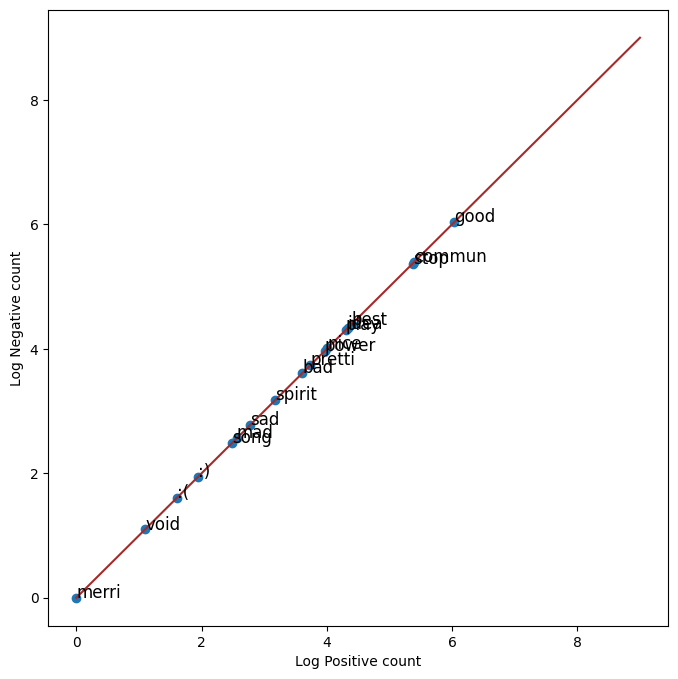

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

x = np.log([x[1] + 1 for x in data])

y = np.log([x[1] + 1 for x in data])

ax.scatter(x, y)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
  ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'brown')
plt.show()

In [ ]:
def extract_features(tweet, freqs):

  word_1 = process_tweet(tweet)
  x = np.zeros((1, 3))
  x[0, 0] = 1

  for word in word_1:
    if (word, 1) in freqs:
      x[0, 1] += freqs.get((word, 1.0), 0)
      x[0, 2] += freqs.get((word, 0.0), 0)

  assert(x.shape == (1, 3))
  return x

In [ ]:
train_x = training_tweets
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 4.523e+03 3.878e+03]]


In [ ]:
tmp2 = extract_features('This batch is best batch', freqs)
print(tmp2)

[[ 1. 90. 23.]]


In [ ]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
  X[i, :] = extract_features(train_x[i], freqs)

train_y = np.append(np.ones((len(all_positive_tweets), 1)), np.zeros((len(all_negative_tweets), 1)), axis=0)
Y = np.ravel(train_y, order='C')

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)
print("Training Accuracy: ", clf.score(X, Y))

Training Accuracy:  0.6166683472824442


In [ ]:
positive_test = list(dataframe[dataframe['Sentiment'] == 'Positive']['OriginalTweet'].astype(str))[9917:]
negative_test = list(dataframe[dataframe['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))
testing_tweets = positive_test + negative_test
test_X = np.zeros((len(testing_tweets), 3))
for i in range(len(testing_tweets)):
  test_X[i, :] = extract_features(testing_tweets[i], freqs)
# training labels corresponding to x
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
test_y = np.ravel(test_y, order='C')
print("Testing Accuracy: ",clf.score(test_X, test_y))

Testing Accuracy:  0.6056732621257223


In [ ]:
def predict_custom_tweet(tweet, freqs):
  x = extract_features(tweet, freqs)
  y_pred = clf.predict(x)
  return y_pred

list_of_tweets = ['\033[92m'+'Thank God coronovirus is over',
                  '\033[91m'+'This is seriously. ridiculous. Stop hoarding',
                  '\033[92m'+'Government efforts are great.',
                  '\033[93m'+'Nonsense' , #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus',
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']


for tweet in list_of_tweets:
  print('%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 0.000000
This is seriously. ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 0.000000
Nonsense -> 0.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000
